# Sesión 12
## Estadistica Aplicada 
**Jose Alfonso Gonzalez Acosta**
- 16 de marzo

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from statsmodels.tsa.api import seasonal_decompose

In [33]:
pasajeros_avion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates=True)

In [34]:
pasajeros_avion

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [35]:
pasajeros_avion = pasajeros_avion.rename(columns={'Thousands of Passengers':'Miles de Pasajeros'})

In [36]:
pasajeros_avion

,Miles de Pasajeros
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [37]:
pasajeros_avion.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [38]:
pasajeros_avion.index.freq = 'MS'

In [39]:
pasajeros_avion.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

Text(0.5, 0, 'Año-Mes')

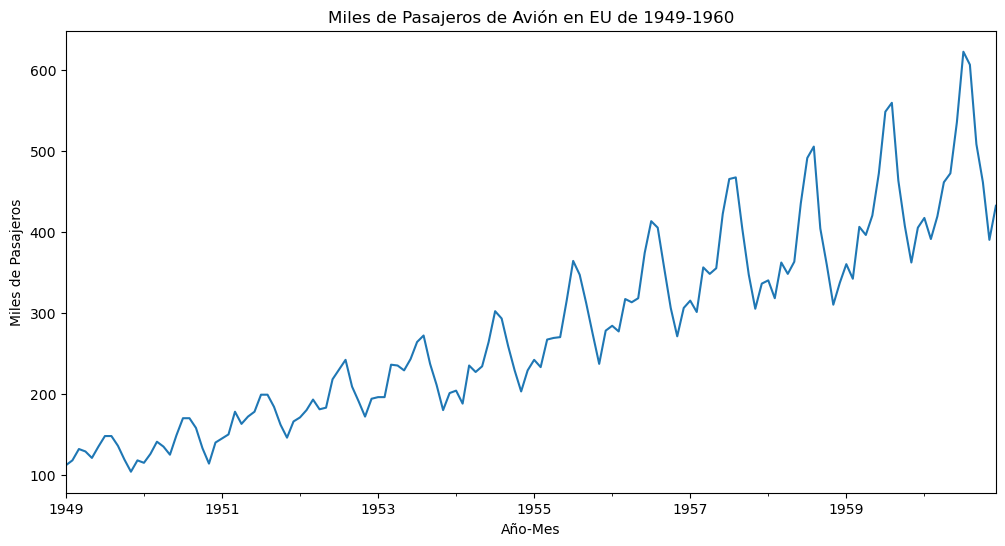

In [40]:
pasajeros_avion['Miles de Pasajeros'].plot(figsize=(12,6))
plt.title('Miles de Pasajeros de Avión en EU de 1949-1960')
plt.ylabel('Miles de Pasajeros')
plt.xlabel('Año-Mes')

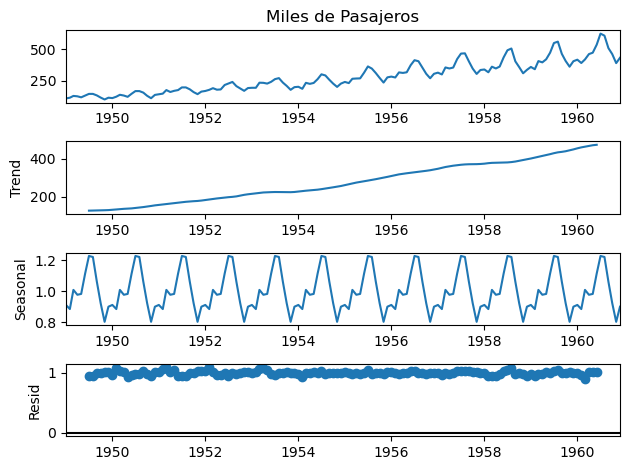

In [41]:
serie1 = seasonal_decompose(pasajeros_avion['Miles de Pasajeros'], model='multiplicative')
serie1.plot()
plt.show()

In [42]:
serie1.seasonal.head(12)

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
Freq: MS, Name: seasonal, dtype: float64

In [43]:
pasajeros_avion['desestacionalizada'] = pasajeros_avion['Miles de Pasajeros']/serie1.seasonal

Text(0.5, 0, 'Año-Mes')

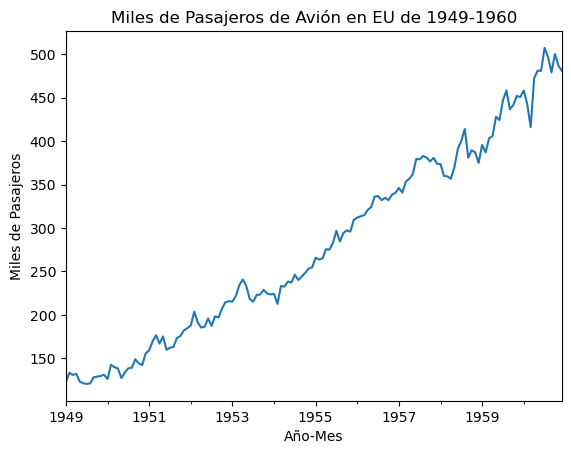

In [44]:
pasajeros_avion['desestacionalizada'].plot();
plt.title('Miles de Pasajeros de Avión en EU de 1949-1960')
plt.ylabel('Miles de Pasajeros')
plt.xlabel('Año-Mes')

Covid 19

In [45]:
confirmados_mex = pd.read_excel('covid_estados.xlsx')

In [46]:
confirmados_mex

,fecha,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,...,san luis potosi,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional
0,2020-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2020-02-28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-02-29,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,2023-03-11,4,8,14,1,1,3,367,22,11,...,8,17,12,2,5,8,22,1,8,878
1110,2023-03-12,2,4,5,0,0,3,259,26,16,...,6,10,15,1,8,5,25,2,4,729
1111,2023-03-13,24,99,72,3,1,40,1145,64,43,...,81,45,64,4,60,42,88,12,20,3450
1112,2023-03-14,4,35,36,1,0,13,459,32,16,...,33,12,20,0,17,18,33,7,7,1339


In [47]:
confirmados_mex['fecha'] = pd.to_datetime(confirmados_mex['fecha'])
confirmados_mex

,fecha,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,...,san luis potosi,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional
0,2020-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2020-02-28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-02-29,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,2023-03-11,4,8,14,1,1,3,367,22,11,...,8,17,12,2,5,8,22,1,8,878
1110,2023-03-12,2,4,5,0,0,3,259,26,16,...,6,10,15,1,8,5,25,2,4,729
1111,2023-03-13,24,99,72,3,1,40,1145,64,43,...,81,45,64,4,60,42,88,12,20,3450
1112,2023-03-14,4,35,36,1,0,13,459,32,16,...,33,12,20,0,17,18,33,7,7,1339


In [48]:
pd.to_datetime(confirmados_mex['fecha'])

0      2020-02-26
1      2020-02-27
2      2020-02-28
3      2020-02-29
4      2020-03-01
          ...    
1109   2023-03-11
1110   2023-03-12
1111   2023-03-13
1112   2023-03-14
1113   2023-03-15
Name: fecha, Length: 1114, dtype: datetime64[ns]

In [49]:
confirmados_mex = confirmados_mex.set_index('fecha')

In [50]:
confirmados_mex.index

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10', '2023-03-11', '2023-03-12', '2023-03-13',
               '2023-03-14', '2023-03-15'],
              dtype='datetime64[ns]', name='fecha', length=1114, freq=None)

In [51]:
confirmados_mex.index.freq = 'D'

(18932.0, 19051.0)

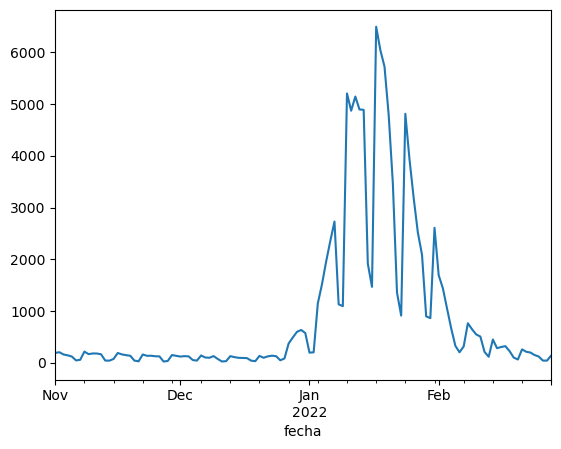

In [52]:
confirmados_mex['nuevo leon'].plot()
plt.xlim('2021-11-01','2022-02-28')

<AxesSubplot:xlabel='fecha'>

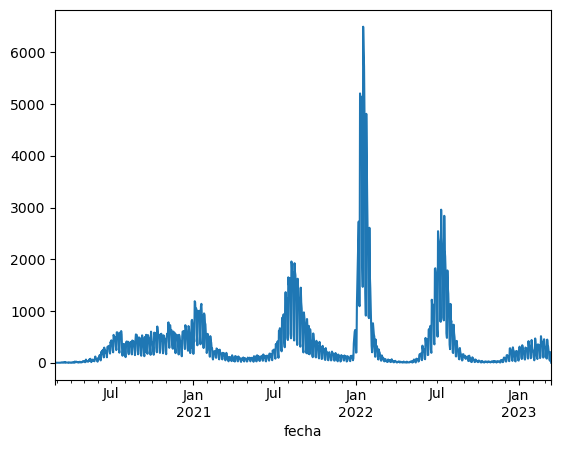

In [53]:
serie2 = seasonal_decompose(confirmados_mex['nuevo leon'])
confirmados_mex['nuevo leon'].plot()